<h1><center> Análise de pellets plásticos como ferramenta para o estudo de permanência de microplásticos em praias arenosas. </center></h1>

Juana Gerevini Bozzetto

# 06. Classes de Histograma (testes)

- Extrair o histograma de 5 pellets com coloração distinta 
- Extrair o histograma das cores (classes) utilizadas por Zanetti (2019)

In [1]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pathlib import Path


#--- Importando as imagens que serão analisadas ---#

from skimage import io

lista_fotos = sorted(glob("dados_rotina06/*.jpg"))

images = {}
for name in lista_fotos:
    images.update(
        {
            Path(name).stem: io.imread(name)
        }
    )

Ordena por grau amarelamento.

In [2]:
keyorder = [
    "amarelamento_nulo",
    "amarelamento_baixo",
    "amarelamento_moderado",
    "amarelamento_alto",
    "amarelamento_muitoalto",
]

images_sorted = {k: images[k] for k in keyorder if k in images}

In [3]:
from skimage import segmentation
from skimage import filters, morphology
from skimage.color import rgb2gray
from skimage.measure import label, regionprops


def remove_background(foto):
    img = rgb2gray(foto)
    mask = img > filters.threshold_otsu(img)
    clean_border = segmentation.clear_border(mask).astype(np.int64) 
    img_edges = segmentation.mark_boundaries(img, clean_border)
    label_img = label(clean_border)
    regions = regionprops(label_img)
    area = 0
    for region in regions:
        if region.area > area:
            area = region.area
            pellet = region
    maskr = morphology.remove_small_objects(mask, pellet.area)
    masked = foto.copy()
    masked[~maskr] = 255
    return masked, maskr

In [4]:
#--- Recortando a área de interesse (pellet) ---#

images_nobg = {}
for foto, data in images_sorted.items():
    masked = remove_background(data)
    images_nobg.update({foto: masked})

In [5]:
def plot_hist(foto, data):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(masked[maskr][..., channel_id], bins=256, range=(0, 256))
        ax0.plot(bin_edges[0:-1], histogram, color=c)
#     ax0.set_ylim([0, 30000])
    ax0.set_xlim([0, 256])
    ax0.set_xlabel("Color value")
    ax0.set_ylabel("Pixels")
    ax0.set_title(foto)

    ax1.imshow(images_nobg[foto][0])
#     ax1.imshow(images_sorted[foto])    

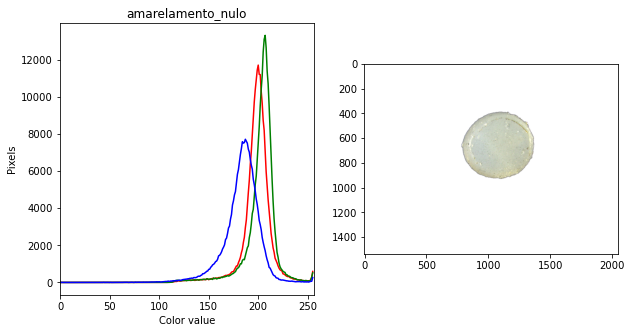

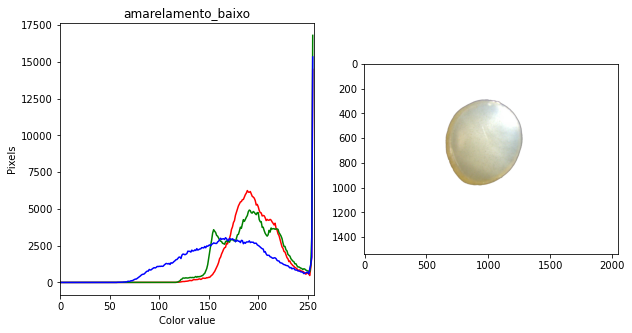

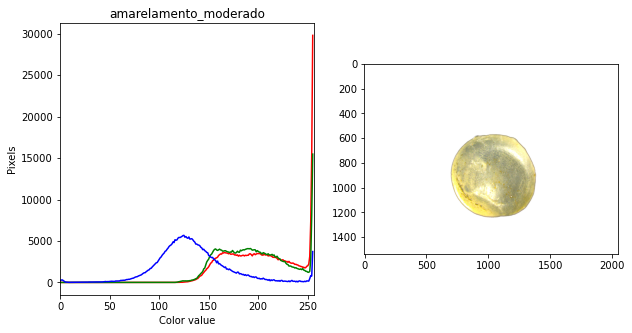

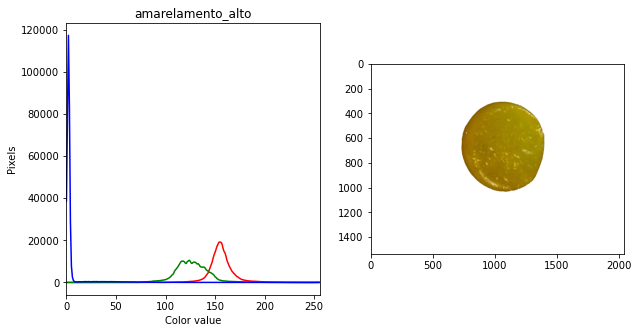

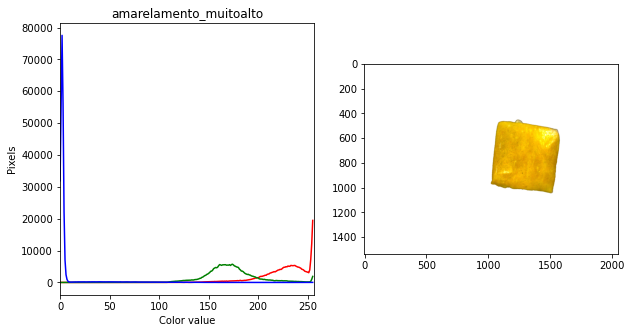

In [6]:
# Tupla para selecionar as cores de cada canal 
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)


# Histrograma com as três linhas, uma para cada cor
for foto, (masked, maskr) in images_nobg.items():
    plot_hist(foto, data)

Vamos ver o RGB em cinza para confirmar que o canal do Azul tem o maior contraste e que define o amarelamento.

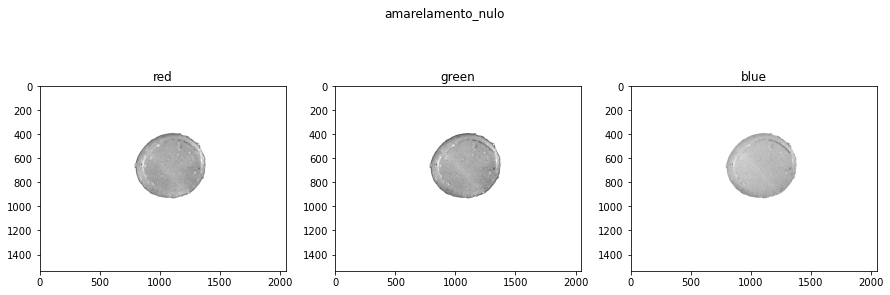

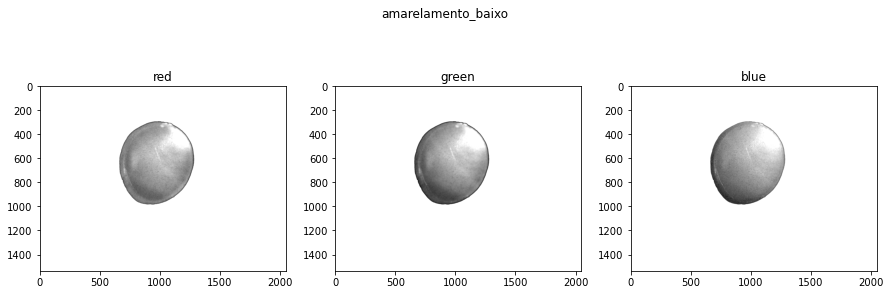

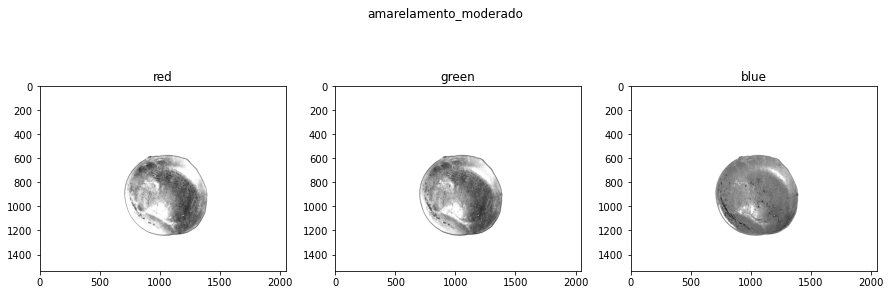

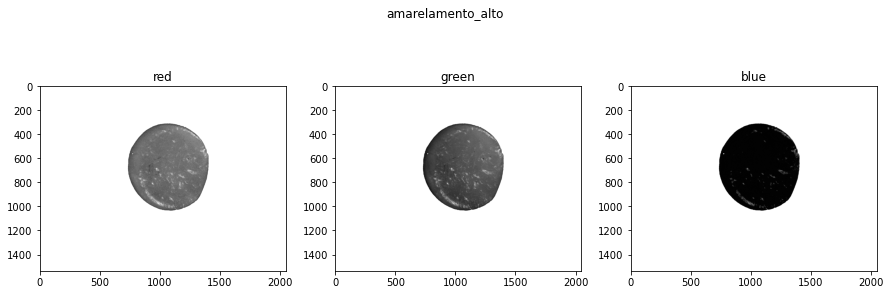

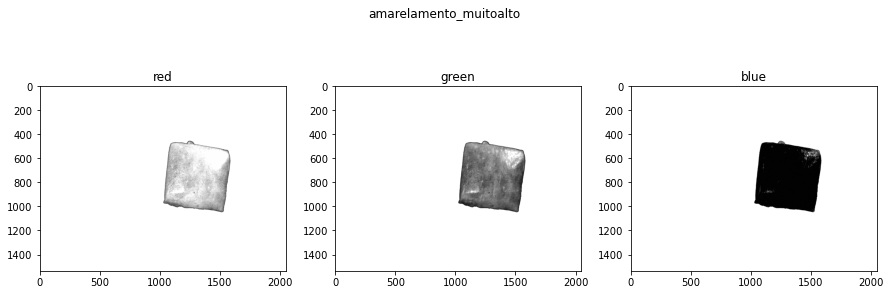

In [7]:
def plot_hist(foto, data):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
    fig.suptitle(foto)
    for channel_id, c, ax in zip(channel_ids, colors, axes):
        gray = masked[..., channel_id]
        ax.set_title(c)
        ax.imshow(gray, cmap="gray")

for foto, (masked, maskr) in images_nobg.items():
    plot_hist(foto, masked)

## Dificuldades Encontradas
- Para algumas imagens o código não funciona
- Alguns histogramas quando feitos individualmentes ficam diferentes, pico azul nos histogramas, pq???

# TODO:


- Usar só o Azul
- Inverter os valores
- Fazer uma média do brilho dos pixels
- Criar intervalos que podemos usar nas outras imagens
- Tentar bater esses intervalos com a classificação da Dani
- Se formar
- Arrumar um emprego que pague muito
- Aposentar e curtir a Vida